# Code for stabilising the Morris-Lecar 2013 (finding the Ihold and Iscale)

## libraries

In [103]:
from brian2 import *
import scipy.io as sio
%matplotlib inline

start_scope()

### creating timed array with current

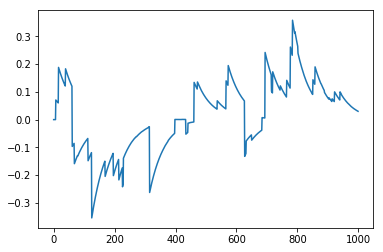

In [104]:
input_I = sio.loadmat('INPUT_THEORY_new.mat')
INPUT = input_I['THEORY']
TimedA=[]
for x in nditer(INPUT):
    TimedA.append(x)

#check
plot(TimedA[0:1000])

### constants 

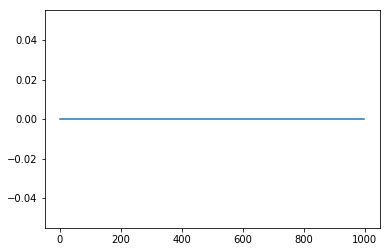

In [105]:
#constants for main model
C=2*ufarad #what is its value
gNa=20*mS
gK=20*mS
gL=2*mS
K=-9*mV
bm=-1.2*mV
Vmax=-75*mV
V_Na=50*mV
V_K=-100*mV
V_L=-7*mV
gammam=18*mV
az=0.005*kHz #0.005 or 0.008
gammaz=5*mV #5 or 17
phiy=0.15*kHz
qh=2.5*kHz
gammay=10*mV
sigmak=20*mV
Vk=-82*mV
bz=0*mV #0 or -43
V1=84*mV
V2=4*mV
V3=25*mV
V4=10.5*mV

#constants of scaling the input
Ihold=0
Iscale=0 #20 or 15

#new stimulus with scaling
for i,x in enumerate(TimedA):
    x=Ihold+Iscale*x
    TimedA[i]=x
    
#checking to see if values were added right
plot(TimedA[0:1000])

#making the stimulus(t)
stimulus=TimedArray(TimedA*pamp,dt=0.1*ms)

#making the xi(t)
xi=[]
for x in range(600000):
    gauss = np.random.normal(0.0, 0.4)
    xi.append(gauss)
Xi=TimedArray(xi*pamp,dt=0.1*ms)
    
#MAIN CONSTANT OF MODEL
by=-15*mV

### model equations

In [106]:
eqs ='''
dV/dt=1/C*(stimulus(t)+Xi(t)-I_Na-I_K-I_L):volt
dy/dt=phiy*lamday*(yinf-y):1
I_Na=gNa*minf*(V-V_Na): ampere
I_K=gK*y*(V-V_K):ampere
I_L=gL*(V-V_L):ampere
minf=0.5*(1+tanh((V-bm)/gammam)):1
yinf=0.5*(1+tanh((V-by)/gammay)):1
lamday=cosh((V-by)/(2*gammay)):1
'''

### neuron statement

In [107]:
G=NeuronGroup(1,eqs,dt=0.1*ms,method='euler')
initial_values = {'V': -70*mV, 'y': 0.}
G.set_states(initial_values)
#G.run_on_event('custom_event1','w=1')
#G.run_on_event('custom_event2','w=0')
#,events={'custom_event1': 'w>1','custom_event2': 'w<0'}

### monitor statement

In [108]:
M = StateMonitor(G, 'V', record=True,dt=0.1*ms)
Y = StateMonitor(G,'y',record=True,dt=0.1*ms)

## Running the simulation

In [109]:
run(3000*ms,report='stdout',report_period=60*second)

WARNING    /home/tzikos/anaconda3/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/tzikos/.cython/brian_extensions/_cython_magic_28a2d12afb17ccb79411bc3f50862404.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
 [py.warnings]


Starting simulation at t=0. s for a duration of 3. s
3.0 (100%) simulated in 1s


### calculate number of spikes

In [110]:
spikes=0
#iterate in list of M.V[0] with three iterators to find the spikes
for i,x in enumerate(M.V[0]):
    if (i>=1) and (i<29999):
        if M.V[0][i-1]<M.V[0][i] and M.V[0][i+1]<M.V[0][i] and M.V[0][i]>=10*mV:
            spikes+=1
print('The firing rate is :',spikes/3)

The firing rate is : 211.0


### plot

Text(0,0.5,'gating variables')

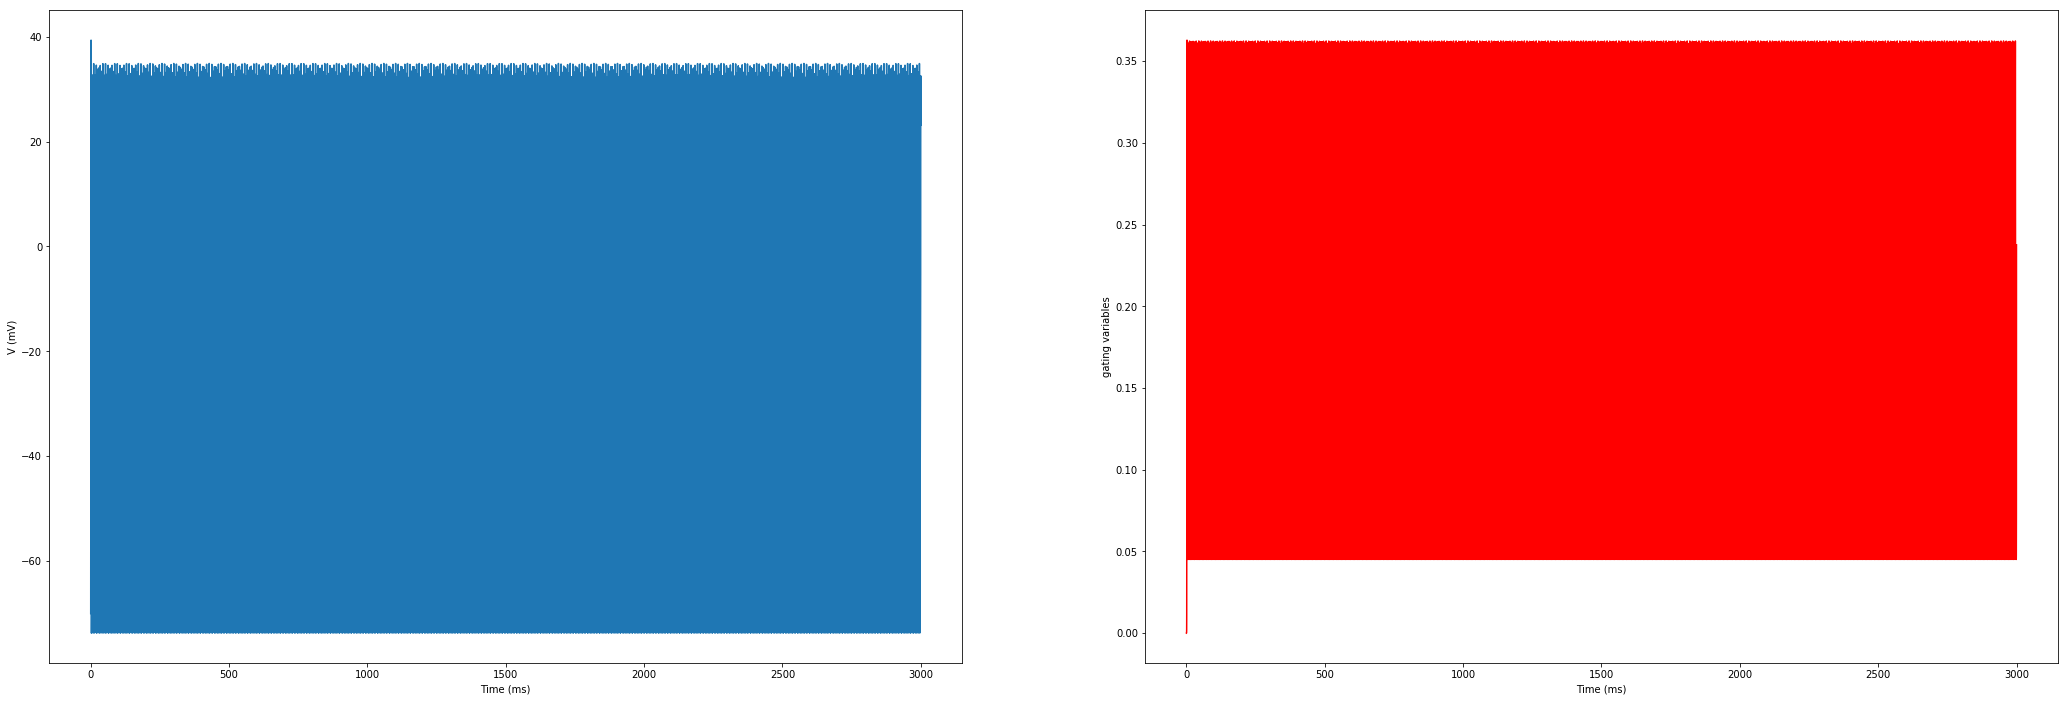

In [111]:
#plotting
figure(figsize=(36,12))
subplot(121)
plot(M.t/ms, M.V[0]/mV)
xlabel('Time (ms)')
ylabel('V (mV)')
subplot(122)
plot(M.t/ms, Y.y[0],'r')
xlabel('Time (ms)')
ylabel('gating variables')